In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
import seaborn as sns

In [9]:
df = pd.read_csv('../../data/zingat_ist_preprocessed.csv')
reg = df.drop(['Unnamed: 0',"il","ilce","mahalle","oda_sayisi"], axis = 1)

In [10]:
X = reg.drop(["fiyat"],axis=1)
y = reg["fiyat"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state=545)

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

lin_reg.score(X_test, y_test)

0.18341881587483644

In [12]:
dt_reg =  DecisionTreeRegressor()
dt_reg.fit(X_train,y_train)

dt_reg.score(X_test, y_test)

0.3573489985581687

In [13]:
rfr_reg =  RandomForestRegressor()
rfr_reg.fit(X_train,y_train)
rfr_reg.score(X_test, y_test)

0.6202217526139244

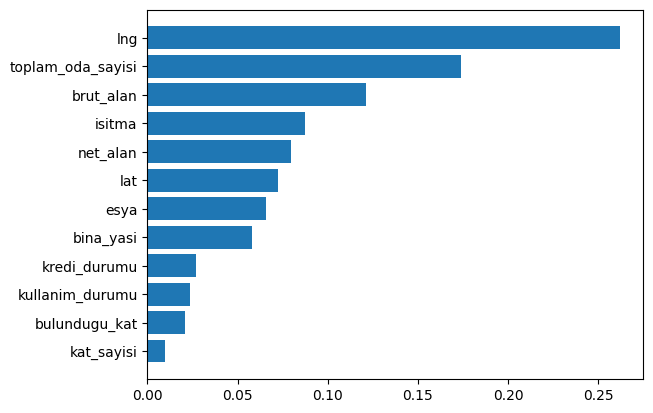

In [14]:
f_i = list(zip(X_test.columns,rfr.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [15]:
X_train = X_train.drop(["kredi_durumu","kullanim_durumu","bulundugu_kat","kat_sayisi"],axis=1)
X_test = X_test.drop(["kredi_durumu","kullanim_durumu","bulundugu_kat","kat_sayisi"],axis=1)

rfr_reg =  RandomForestRegressor()
rfr_reg.fit(X_train,y_train)
rfr_reg.score(X_test, y_test)

0.6090284838307665